 Linear Regression Case Study Based on Adverstisment 
 

In [2]:
# Importing all the Required Library 
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report   

ModuleNotFoundError: No module named 'seaborn'

In [1]:
%matplotlib inline


In [8]:
import sklearn
print(dir(sklearn))

['calibration', 'clone', 'cluster', 'compose', 'config_context', 'covariance', 'cross_decomposition', 'datasets', 'decomposition', 'discriminant_analysis', 'dummy', 'ensemble', 'exceptions', 'experimental', 'externals', 'feature_extraction', 'feature_selection', 'frozen', 'gaussian_process', 'get_config', 'impute', 'inspection', 'isotonic', 'kernel_approximation', 'kernel_ridge', 'linear_model', 'manifold', 'metrics', 'mixture', 'model_selection', 'multiclass', 'multioutput', 'naive_bayes', 'neighbors', 'neural_network', 'pipeline', 'preprocessing', 'random_projection', 'semi_supervised', 'set_config', 'show_versions', 'svm', 'tree']


In [2]:
print(dir(sns))

NameError: name 'sns' is not defined

In [3]:
dt=pd.read_csv('Downloads/data_with_predictions.csv')
dt.head(100)

NameError: name 'pd' is not defined

In [ ]:
dt.shape

(200, 9)

In [ ]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     200 non-null    int64  
 1   TV             200 non-null    float64
 2   radio          200 non-null    float64
 3   newspaper      200 non-null    float64
 4   sales          200 non-null    float64
 5   Area_suburban  200 non-null    int64  
 6   Area_urban     200 non-null    int64  
 7   predictions    200 non-null    float64
 8   error          200 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 14.2 KB


In [ ]:
dt.drop(labels=['Area_suburban','Area_urban','predictions','error'],axis=1)

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [ ]:
dt.describe()

,Unnamed: 0,TV,radio,newspaper,sales,Area_suburban,Area_urban,predictions,error
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,2.000000e+02
mean,100.500000,147.042500,23.264000,30.554000,14.022500,0.390000,0.315000,14.022500,-1.083578e-15
std,57.879185,85.854236,14.846809,21.778621,5.217457,0.488974,0.465682,4.944511,1.665431e+00
min,1.000000,0.700000,0.000000,0.300000,1.600000,0.000000,0.000000,3.569116,-9.026476e+00
25%,50.750000,74.375000,9.975000,12.750000,10.375000,0.000000,0.000000,10.191728,-8.598808e-01
50%,100.500000,149.750000,22.900000,25.750000,12.900000,0.000000,0.000000,13.841137,2.789279e-01
75%,150.250000,218.825000,36.525000,45.100000,17.400000,1.000000,1.000000,17.821683,1.176990e+00
max,200.000000,296.400000,49.600000,114.000000,27.000000,1.000000,1.000000,24.988206,2.592033e+00


Data Distribution of Features

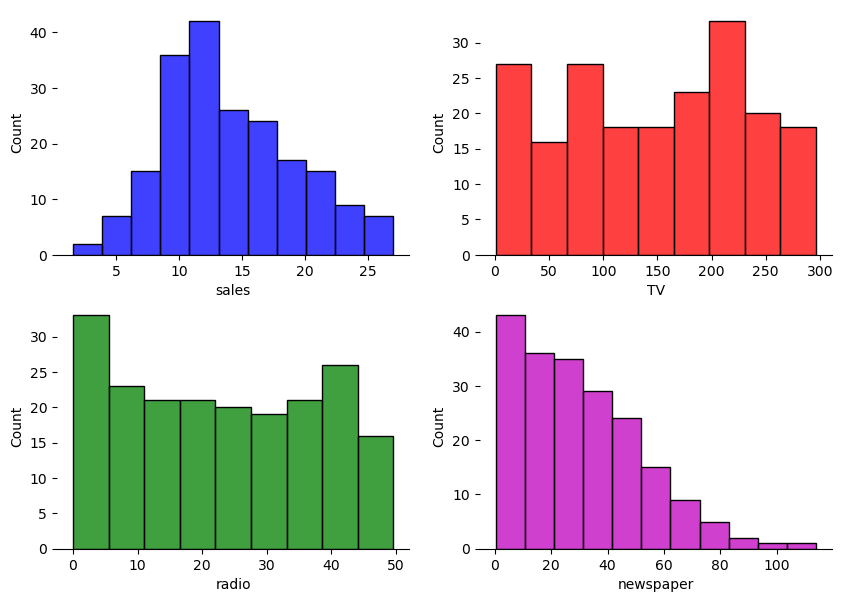

In [ ]:


f, axes = plt.subplots(2, 2, figsize=(10, 7), sharex=False)
sns.despine(left=True)

sns.histplot(dt["sales"], color="b", ax=axes[0, 0])
sns.histplot(dt["TV"], color="r", ax=axes[0, 1])
sns.histplot(dt["radio"], color="g", ax=axes[1, 0])
sns.histplot(dt["newspaper"], color="m", ax=axes[1, 1])

plt.show()

In [ ]:
# realation ship sales

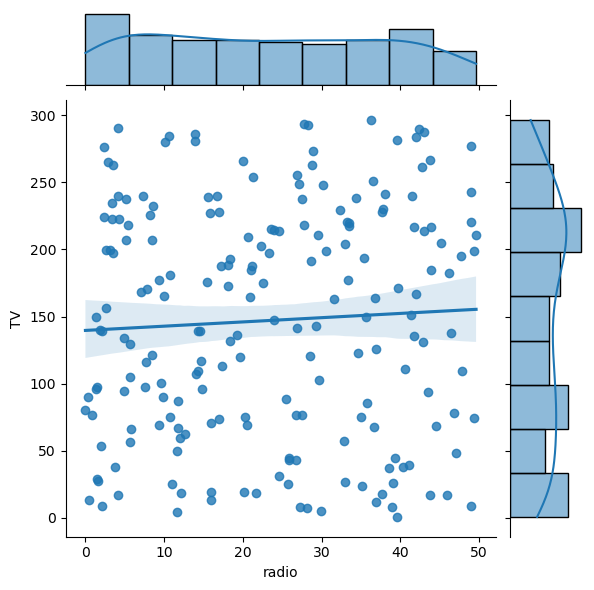

In [ ]:
j1 = sns.jointplot(x="radio", y="TV", data=dt, kind='reg')
plt.show()

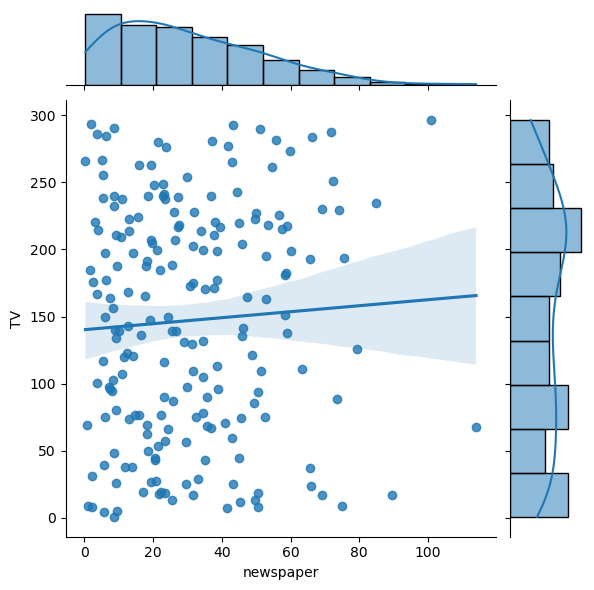

In [ ]:
j2=sns.jointplot(x='newspaper',y='TV',data=dt,kind='reg')
plt.show()


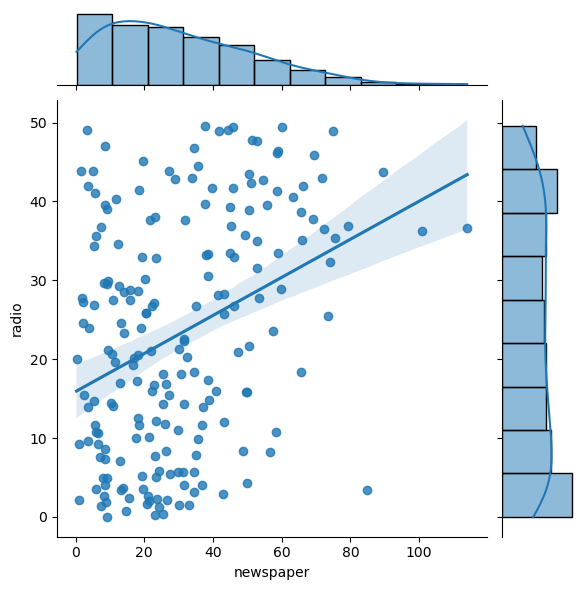

In [ ]:
J3=sns.jointplot(x='newspaper',y='radio',data=dt,kind='reg')
plt.show()

In [ ]:
print(dir(sns))

['FacetGrid', 'JointGrid', 'PairGrid', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', '_base', '_compat', '_core', '_docstrings', '_orig_rc_params', '_statistics', '_stats', 'algorithms', 'axes_style', 'axisgrid', 'barplot', 'blend_palette', 'boxenplot', 'boxplot', 'categorical', 'catplot', 'choose_colorbrewer_palette', 'choose_cubehelix_palette', 'choose_dark_palette', 'choose_diverging_palette', 'choose_light_palette', 'clustermap', 'cm', 'color_palette', 'colors', 'countplot', 'crayon_palette', 'crayons', 'cubehelix_palette', 'dark_palette', 'desaturate', 'despine', 'displot', 'distplot', 'distributions', 'diverging_palette', 'dogplot', 'ecdfplot', 'external', 'get_data_home', 'get_dataset_names', 'heatmap', 'histplot', 'hls_palette', 'husl_palette', 'jointplot', 'kdeplot', 'light_palette', 'lineplot', 'lmplot', 'load_dataset', 'matrix', 'miscplot', 'move_legend', 'mpl', 'mpl_palette', 'pairplot', 

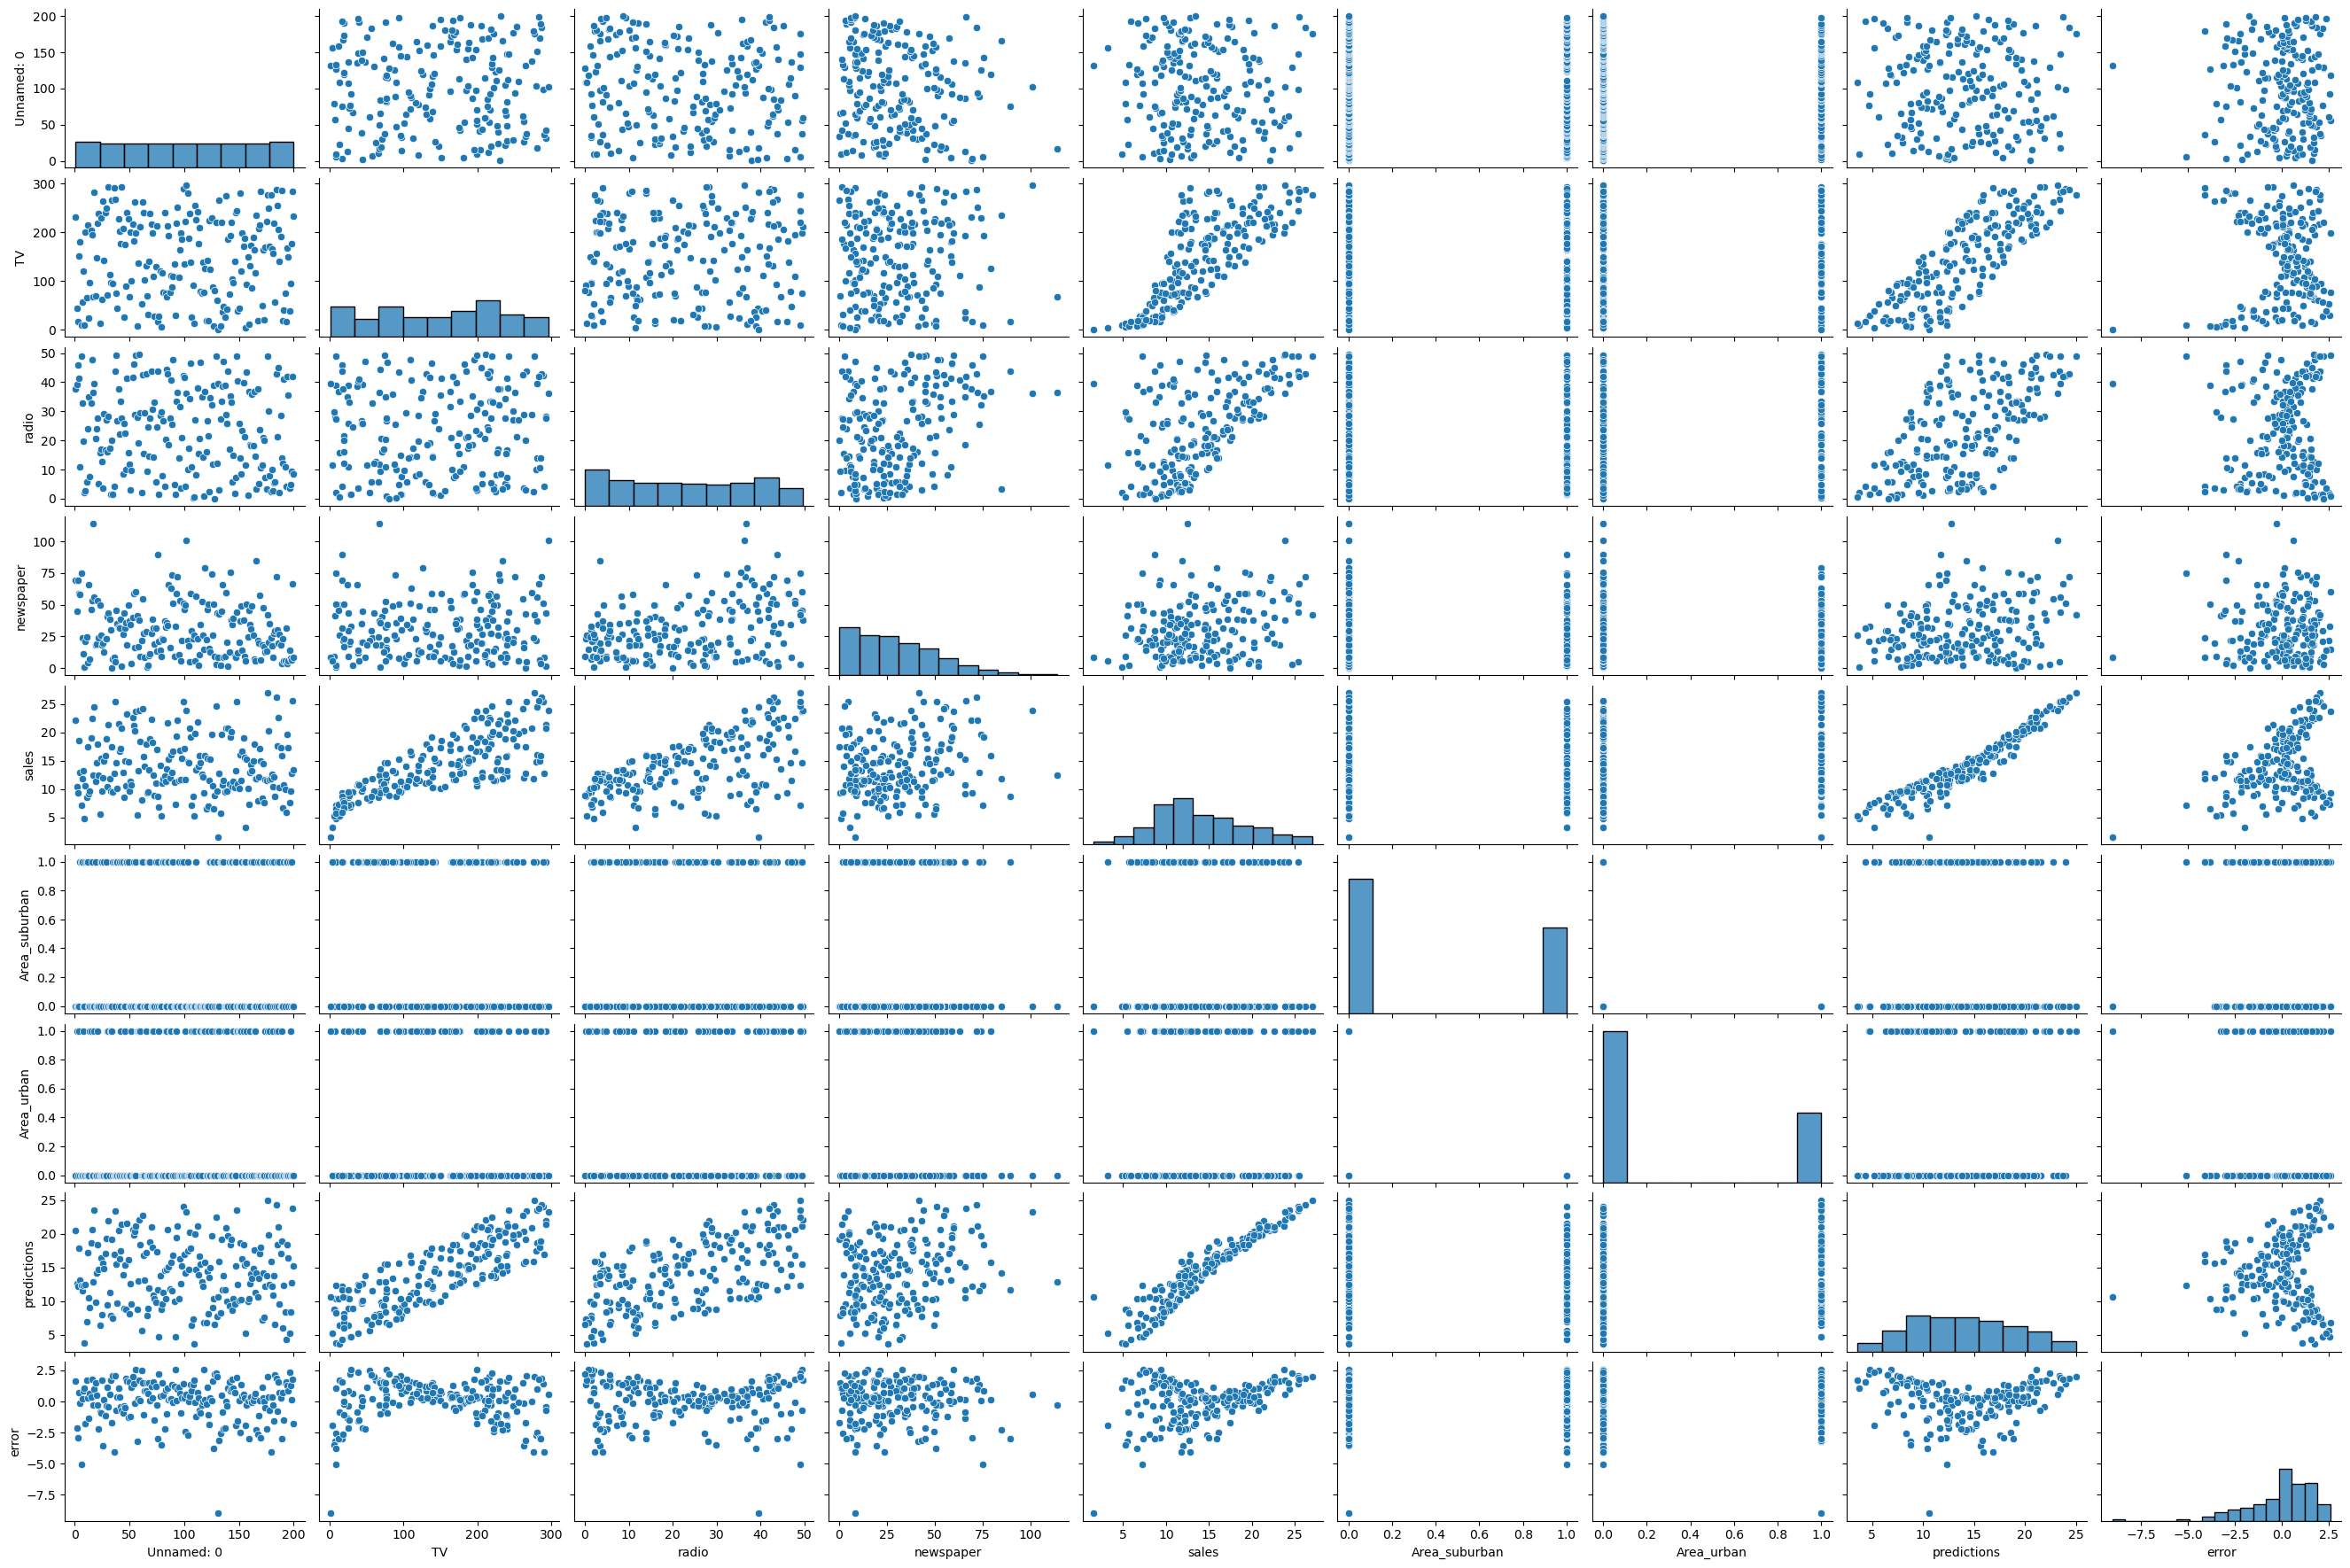

In [ ]:
sns.pairplot(dt, height=2,aspect=1.5)
plt.show()

In [ ]:
features=['TV','radio','newspaper']

In [ ]:
target=['sales']

In [ ]:
dt.head()

,Unnamed: 0,TV,radio,newspaper,sales,Area_suburban,Area_urban,predictions,error
0,1,230.1,37.8,69.2,22.1,0,0,20.480693,1.619307
1,2,44.5,39.3,45.1,10.4,0,1,12.539271,-2.139271
2,3,17.2,45.9,69.3,9.3,0,0,12.248978,-2.948978
3,4,151.5,41.3,58.5,18.5,0,1,17.801707,0.698293
4,5,180.8,10.8,58.4,12.9,1,0,13.050091,-0.150091


In [ ]:
dt[features]

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [ ]:
dt[target]

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9
...,...
195,7.6
196,9.7
197,12.8
198,25.5


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(dt[features],dt[target],test_size=0.05,random_state=5000)

In [ ]:
X_train.head(),y_train.head()

(        TV  radio  newspaper
 64   131.1   42.8       28.9
 77   120.5   28.5       14.2
 169  284.3   10.6        6.4
 163  163.5   36.8        7.4
 100  222.4    4.3       49.8,
      sales
 64    18.0
 77    14.2
 169   15.0
 163   18.0
 100   11.7)

In [ ]:
X_test.head(),y_test.head()

(        TV  radio  newspaper
 199  232.1    8.6        8.7
 28   248.8   27.1       22.9
 123  123.1   34.6       12.4
 1     44.5   39.3       45.1
 121   18.8   21.7       50.4,
      sales
 199   13.4
 28    18.9
 123   15.2
 1     10.4
 121    7.0)

In [ ]:
from sklearn.linear_model import LinearRegression 
lr=LinearRegression(fit_intercept=True)

In [ ]:
from sklearn.linear_model import LinearRegression 
lr=LinearRegression(fit_intercept=True)

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
LoR=Lasso(fit_intercept=True)
RiR=Ridge(fit_intercept=True)

In [ ]:
LoR.fit(X_train,y_train)
RiR.fit(X_train,y_train)

Lasso()

In [ ]:
lr.fit(X_train,y_train)


LinearRegression()

In [ ]:
print('Linear Intercept:',lr.intercept_)

Linear Intercept: [2.98804537]


In [ ]:
print(' Lasso Intercept:',LoR.intercept_)

 Lasso Intercept: [3.09618112]


In [ ]:
print('Linear Coefficients:',lr.coef_)

Linear Coefficients: [[ 0.04574295  0.18812717 -0.00031962]]


In [ ]:
print('Lasso Coefficients:',LoR.coef_)

Lasso Coefficients: [0.04567221 0.1834823  0.        ]


In [ ]:
y_pred_train=lr.predict(X_train)

In [ ]:
y_pred_train_Lasso=LoR.predict(X_train)
y_pred_train_Ridge=RiR.predict(X_train)

In [ ]:
print(y_pred_train)

[[17.02755225]
 [13.85715676]
 [17.98486857]
 [17.38773256]
 [13.95430738]
 [18.00624166]
 [15.00293682]
 [20.925685  ]
 [12.60984156]
 [ 8.94223668]
 [18.68431423]
 [20.88297629]
 [ 9.18845319]
 [22.95622551]
 [12.02277   ]
 [17.122956  ]
 [ 4.56793713]
 [ 9.96950398]
 [10.65892863]
 [21.30848509]
 [14.81321194]
 [16.60213615]
 [ 9.53961681]
 [17.669057  ]
 [14.47856617]
 [15.03281197]
 [ 7.62665857]
 [ 6.62163142]
 [13.27147858]
 [20.49960471]
 [23.31680333]
 [21.15520632]
 [11.8009309 ]
 [10.64681483]
 [15.68391965]
 [17.35562597]
 [ 9.87985222]
 [23.34302283]
 [ 6.65368948]
 [14.42946875]
 [15.4506998 ]
 [ 7.09505724]
 [ 9.97134351]
 [ 8.20238456]
 [23.84092868]
 [19.22968853]
 [15.35846904]
 [17.00272496]
 [11.95368497]
 [10.00421559]
 [ 8.85705541]
 [ 6.56722137]
 [ 9.76034634]
 [18.89982051]
 [17.10533226]
 [10.08764523]
 [19.01740323]
 [21.18553391]
 [13.99000919]
 [19.72965792]
 [ 5.80470774]
 [18.43123334]
 [ 9.05617363]
 [20.01342198]
 [11.49305225]
 [14.47714404]
 [ 6.62857

In [ ]:
print(y_pred_train_Lasso)

[16.9368502  13.82892786 18.02570237 17.31573594 14.04265417 17.90795751
 15.02185486 20.89930311 12.69854234  9.00945301 18.70883673 20.77263649
  9.24388887 22.8650235  12.09010536 17.09008224  4.67762974 10.05201401
 10.62340851 21.25244226 14.83388469 16.62399721  9.56772037 17.5933398
 14.46698988 14.99877117  7.72388669  6.70880836 13.33532527 20.42672745
 23.19429504 21.05278899 11.80783584 10.58988593 15.57192085 17.30847092
  9.87157225 23.29383128  6.75909223 14.44403953 15.36628166  7.17931145
  9.96363079  8.25343672 23.75507614 19.18567803 15.25471959 16.92227572
 11.88621808 10.01808515  8.8289319   6.61642289  9.85260833 18.89636572
 17.12623281 10.16376968 18.98452672 21.1074814  14.06636309 19.69653709
  5.90660888 18.46677402  9.04852034 19.91280876 11.42119947 14.38512265
  6.73232368 12.30075295 18.15345122 21.66745948 13.76711333 20.26874415
 17.35629504 21.58800129  9.85276703 14.29566675  5.519744   24.0887213
 22.14840147 20.54098732 18.4205622  20.63085904 12.1

In [ ]:
print(dir(pd))

['ArrowDtype', 'BooleanDtype', 'Categorical', 'CategoricalDtype', 'CategoricalIndex', 'DataFrame', 'DateOffset', 'DatetimeIndex', 'DatetimeTZDtype', 'ExcelFile', 'ExcelWriter', 'Flags', 'Float32Dtype', 'Float64Dtype', 'Grouper', 'HDFStore', 'Index', 'IndexSlice', 'Int16Dtype', 'Int32Dtype', 'Int64Dtype', 'Int8Dtype', 'Interval', 'IntervalDtype', 'IntervalIndex', 'MultiIndex', 'NA', 'NaT', 'NamedAgg', 'Period', 'PeriodDtype', 'PeriodIndex', 'RangeIndex', 'Series', 'SparseDtype', 'StringDtype', 'Timedelta', 'TimedeltaIndex', 'Timestamp', 'UInt16Dtype', 'UInt32Dtype', 'UInt64Dtype', 'UInt8Dtype', '__all__', '__builtins__', '__cached__', '__doc__', '__docformat__', '__file__', '__git_version__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', '_built_with_meson', '_config', '_is_numpy_dev', '_libs', '_pandas_datetime_CAPI', '_pandas_parser_CAPI', '_testing', '_typing', '_version_meson', 'annotations', 'api', 'array', 'arrays', 'bdate_range', 'compat', 'conca

In [ ]:
y_pred_test = lr.predict(X_test)
y_pred_test_Lasso = LoR.predict(X_test)
y_pred_test_Ridge = RiR.predict(X_test)

In [ ]:
y_pred_test

array([[15.22009711],
       [19.45981854],
       [15.12423951],
       [12.40258987],
       [ 7.91426381],
       [11.41350004],
       [15.66607952],
       [12.38771194],
       [15.66955342],
       [16.44776759]])

In [ ]:
y_pred_test_Lasso

array([15.27464849, 19.43179697, 15.06691765, 12.3394489 ,  7.93638461,
       11.44516552, 15.74559276, 12.30358081, 15.60147609, 16.44881144])

Model Evaluation  using Metrics 


In [ ]:
MAE_train=metrics.mean_absolute_error(y_train,y_pred_train)

In [ ]:
MAE_train=metrics.mean_absolute_error(y_train,y_pred_train_Lasso)

In [ ]:
MAE_train=metrics.mean_absolute_error(y_test,y_pred_test)

In [ ]:
MAE_train=metrics.mean_absolute_error(y_test,y_pred_test_Lasso)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

print("MSE:", mean_squared_error(y_train, y_pred_train))
print("R2 Score:", r2_score(y_train, y_pred_train))

print("MSE: Lasso", mean_squared_error(y_train, y_pred_train_Lasso))
print("R2 Score: Lasso", r2_score(y_train, y_pred_train_Lasso))

print("MSE: Lasso", mean_squared_error(y_train, y_pred_train_Ridge))
print("R2 Score: Lasso", r2_score(y_train, y_pred_train_Ridge))

MSE: 2.7655529731609403
R2 Score: 0.900675066045005
MSE: Lasso 2.770149801329603
R2 Score: Lasso 0.9005099707968988
